C:\Users\jmcc0\AppData\Local\Temp\ipykernel_20452\922550555.py:30: RuntimeWarning: divide by zero encountered in divide
  y = -1 / np.tan(k(x) * L / 2)
C:\Users\jmcc0\AppData\Local\Temp\ipykernel_20452\922550555.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mB * (V0 - x) / 3.809982143)
C:\Users\jmcc0\AppData\Local\Temp\ipykernel_20452\922550555.py:41: RuntimeWarning: divide by zero encountered in divide
  return mW / mB * K(x) / k(x)


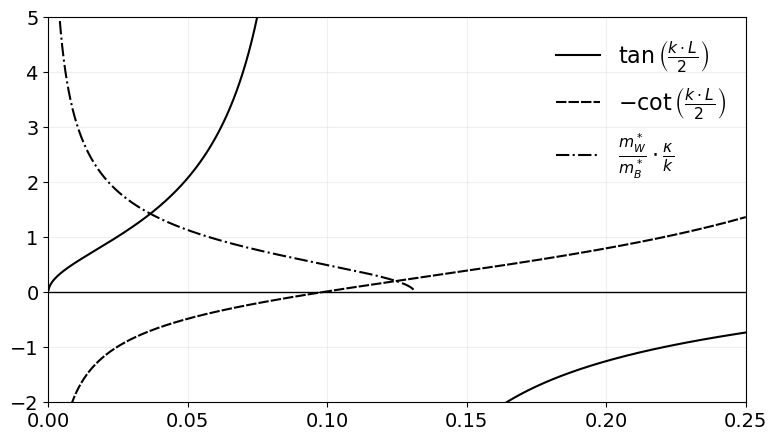

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Constants
V0 = 0.131234
L = 90
mW = 0.047422
mB = 0.0602291

# Define functions
def k(x):
    return np.sqrt(mW * x / 3.809982143)

def K(x):
    return np.sqrt(mB * (V0 - x) / 3.809982143)

def y1(x):
    y = np.tan(k(x) * L / 2)
    # Identify where the function changes sign
    mask = np.diff(np.sign(y)) != 0
    # Adjust mask to preserve zeros
    mask_adjusted = np.insert(mask, 0, False)
    mask_adjusted = np.append(mask_adjusted, False)
    # Set those points as NaNs
    y[mask_adjusted[:-1]] = np.nan
    return y

def y2(x):
    y = -1 / np.tan(k(x) * L / 2)
    # Identify where the function changes sign
    mask = np.diff(np.sign(y)) != 0
    # Adjust mask to preserve zeros
    mask_adjusted = np.insert(mask, 0, False)
    mask_adjusted = np.append(mask_adjusted, False)
    # Set those points as NaNs
    y[mask_adjusted[:-1]] = np.nan
    return y

def y3(x):
    return mW / mB * K(x) / k(x)

# Generate x values
x_values = np.linspace(0, V0+0.2, 10000)

# Generate y values for each function
y1_values = y1(x_values)
y2_values = y2(x_values)
y3_values = y3(x_values)

# Plotting
plt.figure(figsize=(9, 5))

plt.plot(x_values, y1_values, color='black', label=r'$\tan\left(\frac{k\cdot L}{2}\right)$')
plt.plot(x_values, y2_values, color='black', linestyle=(0, (5, 1)), label=r'$-\cot\left(\frac{k\cdot L}{2}\right)$')
plt.plot(x_values, y3_values, color='black', linestyle='-.', label=r'$\frac{m^*_{W}}{m^*_{B}}\cdot\frac{\kappa}{k}$')

plt.axhline(0, color='black', linewidth=1)  # Solid black x-axis at y=0
plt.xlim(0, 0.25)  # Set x-axis limits
plt.ylim(-2, 5)  # Set y-axis limits
plt.grid(True, alpha=0.2)
TICK_FONT_SIZE = 14
plt.xticks(fontsize=TICK_FONT_SIZE)
plt.yticks(fontsize=TICK_FONT_SIZE)

# Set font family and size for legend
font = FontProperties(family='Constantina', size=16)
plt.legend(loc='upper right', prop=font, frameon=False)

plt.show()
